# Project 2 - Binary with S-Type Planet
# Brandon Shane, Ina Park, Toshan Vysyraju, Arya Lakshmanan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from astropy import constants as const
from astropy import units as u

In [2]:
#Defining given values here to be used later
#Values are given in AU and solar masses
M1 = 1
M2 = 2
M = M1 + M2
a = 1
e = 0
mu = (M1*M2)/(M1+M2)
G = 4*np.pi**2

In [3]:
def df_2body(vec,t):
    x1,y1,z1,vx1,vy1,vz1,x2,y2,z2,vx2,vy2,vz2 = vec

    r = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
    GM1r3 = (M2*4.0*np.pi**2)/(r**3)
    GM2r3 = (M1*4.0*np.pi**2)/(r**3)

    dvec = np.zeros(len(vec))
    dvec[0] = vx1
    dvec[1] = vy1
    dvec[2] = vz1
    dvec[3] = GM1r3*(x2-x1)
    dvec[4] = GM1r3*(y2-y1)
    dvec[5] = GM1r3*(z2-z1)
    dvec[6] = vx2
    dvec[7] = vy2
    dvec[8] = vz2
    dvec[9] = GM2r3*(x1-x2)
    dvec[10] = GM2r3*(y1-y2)
    dvec[11] = GM2r3*(z1-z2)
    return dvec

In [4]:
# Here, we consider the time when out two bodies are furthest away
# Additionally, we orient our axis such that both bodies lie on the x-axis
x10 = -(mu/M1)*a
x20 = (mu/M2)*a

l = np.sqrt(4*(np.pi**2)*M*a*(1-e**2))

v0 = l/(a*(1-e**2))

vy10 = -(mu/M1)*v0
vy20 = (mu/M2)*v0

vec0 = np.array([x10, 0, 0,
                 0, vy10, 0,
                 x20, 0, 0,
                 0, vy20, 0])

P = np.sqrt((a**3)/M)
tarr = np.linspace(0, P, 200)

ans = integrate.odeint(df_2body, vec0, tarr)
x1 = ans[:,0]
y1 = ans[:,1]
z1 = ans[:,2]
vx1 = ans[:,3]
vy1 = ans[:,4]
vz1 = ans[:,5]
x2 = ans[:,6]
y2 = ans[:,7]
z2 = ans[:,8]
vx2 = ans[:,9]
vy2 = ans[:,10]
vz2 = ans[:,11]
print()

In [5]:
r12 = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)

v1 = np.sqrt(vx1**2 +  vy1**2 + vz1**2)
v2 = np.sqrt(vx2**2 +  vy2**2 + vz2**2)

U1 = -(G*M2*M1)/r12

K1 = 0.5*M1*v1**2
K2 = 0.5*M2*v2**2


Etot = K1 + K2 + U1

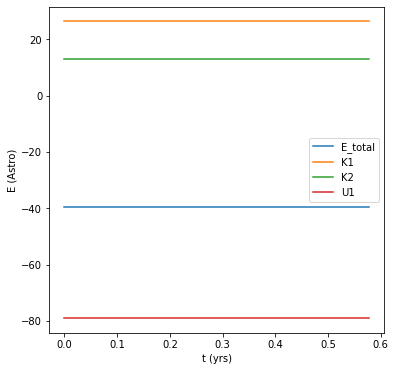

In [6]:
plt.figure(figsize=(6,6))
plt.plot(tarr, Etot, label = 'E_total')
plt.plot(tarr, K1, label = 'K1')
plt.plot(tarr, K2, label = 'K2')
plt.plot(tarr, U1, label = 'U1')
plt.xlabel('t (yrs)')
plt.ylabel('E (Astro)')

plt.legend()

plt.show()

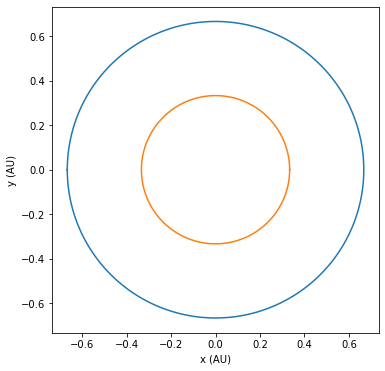

In [7]:
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.gca().set_aspect('equal')
plt.show()

# Add third, massless object

In [8]:
M3 = 0.01

In [9]:
def df_3body(vec,t):
    x1,y1,z1,vx1,vy1,vz1,x2,y2,z2,vx2,vy2,vz2,x3,y3,z3,vx3,vy3,vz3 = vec

    r1 = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
    GM1r13 = (M2*4.0*np.pi**2)/(r1**3)
    GM2r13 = (M1*4.0*np.pi**2)/(r1**3)
    
    r2 = np.sqrt((x2-x3)**2 + (y2-y3)**2 + (z2-z3)**2)
    GM2r23 = (M3*4.0*np.pi**2)/(r2**3)
    GM3r23 = (M2*4.0*np.pi**2)/(r2**3)
    
    r3 = np.sqrt((x3-x1)**2 + (y3-y1)**2 + (z3-z1)**2)
    GM3r33 = (M1*4.0*np.pi**2)/(r3**3)
    GM1r33 = (M3*4.0*np.pi**2)/(r3**3)

    dvec = np.zeros(len(vec))
    dvec[0] = vx1
    dvec[1] = vy1
    dvec[2] = vz1
    dvec[3] = GM1r13 * (x2 - x1) + GM1r33 * (x3 - x1)
    dvec[4] = GM1r13 * (y2 - y1) + GM1r33 * (y3 - y1)
    dvec[5] = GM1r13 * (z2 - z1) + GM1r33 * (z3 - z1)
    dvec[6] = vx2
    dvec[7] = vy2
    dvec[8] = vz2
    dvec[9] = GM2r13 * (x1 - x2) + GM2r23 * (x3 - x2)
    dvec[10] = GM2r13 * (y1 - y2) + GM2r23 * (y3 - y2)
    dvec[11] = GM2r13 * (z1 - z2) + GM2r23 * (z3 - z2)
    dvec[12] = vx3
    dvec[13] = vy3
    dvec[14] = vz3
    dvec[15] = GM3r23 * (x2 - x3) + GM3r33 * (x1 - x3)
    dvec[16] = GM3r23 * (y2 - y3) + GM3r33 * (y1 - y3)
    dvec[17] = GM3r23 * (z2 - z3) + GM3r33 * (z1 - z3)
    
    return dvec

In [10]:
e12 = 0.5
e23 = 0.3

M12 = M
M23 = M2 + M3

mu12 = (M1 * M2)/(M1 + M2)
mu23 = (M2 * M3)/(M2 + M3)

a12 = 1
a23 = 0.1

In [11]:
# Here, we consider the time when out two bodies are furthest away
# Additionally, we orient our axis such that both bodies lie on the x-axis
l12 = np.sqrt(4*(np.pi**2) * M12 * a12 * (1 - e12**2))
l23 = np.sqrt(4*(np.pi**2) * M23 * a23 * (1 - e23**2))

v12_0 = (l12 * (1 + e12))/(a12 * (1 - e12**2))
v23_0 = (l23 * (1 + e23))/(a23 * (1 - e23**2))

vy10 = -(mu12/M1) * v12_0
vy20 = (mu12/M2) * v12_0
vy30 = (mu23/M3) * v23_0 + vy20

vy_com = (1/(M1 + M2 + M3)) * ((vy10 * M1) + (vy20 * M2) + (vy30 * M3))

vy10 -= vy_com
vy20 -= vy_com
vy30 -= vy_com

x10 = -(mu12/M1) * (a12 * (1 - e12**2))/(1 + e12)
x20 = (mu12/M2) * (a12 * (1 - e12**2))/(1 + e12)
x30 = (mu23/M3) * (a23 * (1 - e23**2))/(1 + e23) + x20

x_com = (1/(M1 + M2 + M3)) * ((x10 * M1) + (x20 * M2) + (x30 * M3))

x10 -= x_com
x20 -= x_com
x30 -= x_com

vec0 = np.array([x10, 0, 0,
                 0, vy10, 0,
                 x20, 0, 0,
                 0, vy20, 0,
                 x30, 0, 0,
                 0, vy30, 0])

r12 = np.sqrt((x10-x20)**2)
r23 = np.sqrt((x20-x30)**2)
r31 = np.sqrt((x30-x10)**2)

v1 = vy10
v2 = vy20
v3 = vy30

U12 = -(G*M2*M1)/r12
U23 = -(G*M3*M2)/r23
U31 = -(G*M1*M3)/r31

K1 = 0.5*M1*v1**2
K2 = 0.5*M2*v2**2
K3 = 0.5*M3*v3**2

Etot = K1 + K2 + K3 + U12 + U23 + U31

In [12]:
P = np.sqrt((a12**3)/M)
tarr = np.linspace(0, 2*P, 20000)

ans = integrate.odeint(df_3body, vec0, tarr)

x1 = ans[:,0]
y1 = ans[:,1]
z1 = ans[:,2]
vx1 = ans[:,3]
vy1 = ans[:,4]
vz1 = ans[:,5]
x2 = ans[:,6]
y2 = ans[:,7]
z2 = ans[:,8]
vx2 = ans[:,9]
vy2 = ans[:,10]
vz2 = ans[:,11]
x3 = ans[:,12]
y3 = ans[:,13]
z3 = ans[:,14]
vx3 = ans[:,15]
vy3 = ans[:,16]
vz3 = ans[:,17]

In [13]:
r12 = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
r23 = np.sqrt((x2-x3)**2 + (y2-y3)**2 + (z2-z3)**2)
r31 = np.sqrt((x3-x1)**2 + (y3-y1)**2 + (z3-z1)**2)

v1 = np.sqrt(vx1**2 +  vy1**2 + vz1**2)
v2 = np.sqrt(vx2**2 +  vy2**2 + vz2**2)
v3 = np.sqrt(vx3**2 +  vy3**2 + vz3**2)

U12 = -(G*M2*M1)/r12
U23 = -(G*M3*M2)/r23
U31 = -(G*M1*M3)/r31

K1 = 0.5*M1*v1**2
K2 = 0.5*M2*v2**2
K3 = 0.5*M3*v3**2

Etot = K1 + K2 + K3 + U12 + U23 + U31

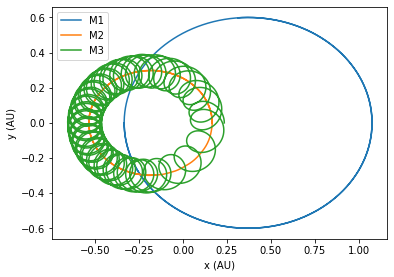

In [14]:
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label = 'M1')
plt.plot(x2, y2, label = 'M2')
plt.plot(x3, y3, label = 'M3')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.gca().set_aspect('equal')

plt.legend()

plt.show()

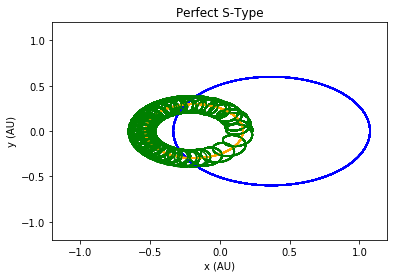

In [25]:
# count = 0
# for i in np.linspace(1,x1.size,100):
#     i = int(i)
#     count += 1
#     plt.plot(x1[1:i], y1[1:i], label = 'M1',color = 'blue')
#     plt.plot(x2[1:i], y2[1:i], label = 'M2',color = 'orange')
#     plt.plot(x3[1:i], y3[1:i], label = 'M3',color = 'green')
#     plt.xlabel('x (AU)')
#     plt.ylabel('y (AU)')
# #     plt.gca().set_aspect('equal')
#     plt.xlim([-1.2,1.2])
#     plt.ylim([-1.2,1.2])
#     plt.title('Perfect S-Type')
#     plt.savefig('S-type frame' + str(count))

# # plt.legend()

# plt.show()

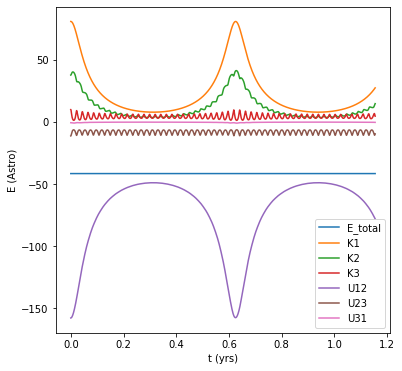

In [26]:
plt.figure(figsize=(6,6))
plt.plot(tarr, Etot, label = 'E_total')
plt.plot(tarr, K1, label = 'K1')
plt.plot(tarr, K2, label = 'K2')
plt.plot(tarr, K3, label = 'K3')
plt.plot(tarr, U12, label = 'U12')
plt.plot(tarr, U23, label = 'U23')
plt.plot(tarr, U31, label = 'U31')
plt.xlabel('t (yrs)')
plt.ylabel('E (Astro)')

plt.legend()

plt.show()

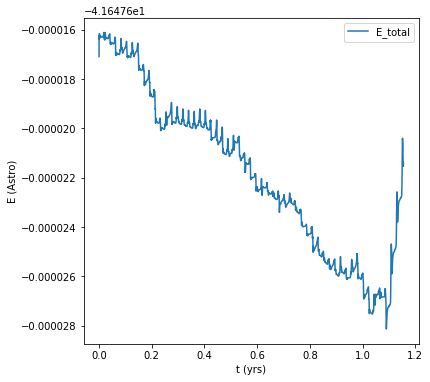

In [27]:
plt.figure(figsize=(6,6))
plt.plot(tarr, Etot, label = 'E_total')
plt.xlabel('t (yrs)')
plt.ylabel('E (Astro)')

plt.legend()

plt.show()

# Variation 1 - changing the planet's initial position to get the planet to transfer from M2 to M1

### Lets set the distance between M2 and M3 to increase by 15.4%.

In [28]:
# Here, we consider the time when out two bodies are furthest away
# Additionally, we orient our axis such that both bodies lie on the x-axis
l12 = np.sqrt(4*(np.pi**2) * M12 * a12 * (1 - e12**2))
l23 = np.sqrt(4*(np.pi**2) * M23 * a23 * (1 - e23**2))

v12_0 = (l12 * (1 + e12))/(a12 * (1 - e12**2))
v23_0 = (l23 * (1 + e23))/(a23 * (1 - e23**2))

vy10 = -(mu12/M1) * v12_0
vy20 = (mu12/M2) * v12_0
vy30 = (mu23/M3) * v23_0 + vy20

vy_com = (1/(M1 + M2 + M3)) * ((vy10 * M1) + (vy20 * M2) + (vy30 * M3))

vy10 -= vy_com
vy20 -= vy_com
vy30 -= vy_com

x10 = -(mu12/M1) * (a12 * (1 - e12**2))/(1 + e12)
x20 = (mu12/M2) * (a12 * (1 - e12**2))/(1 + e12)
x30 = (mu23/M3) * (a23 * (1 - e23**2))/(1 + e23) + x20

x_com = (1/(M1 + M2 + M3)) * ((x10 * M1) + (x20 * M2) + (x30 * M3))

x10 -= x_com
x20 -= x_com
x30 -= x_com

# here we increase the distance between M2 and M3 by 15.4%
distance_between_23 = x30 - x20
distance_between_23 *= 0.154
x30 += distance_between_23

vec0 = np.array([x10, 0, 0,
                 0, vy10, 0,
                 x20, 0, 0,
                 0, vy20, 0,
                 x30, 0, 0,
                 0, vy30, 0])

r12 = np.sqrt((x10-x20)**2)
r23 = np.sqrt((x20-x30)**2)
r31 = np.sqrt((x30-x10)**2)

v1 = vy10
v2 = vy20
v3 = vy30

U12 = -(G*M2*M1)/r12
U23 = -(G*M3*M2)/r23
U31 = -(G*M1*M3)/r31

K1 = 0.5*M1*v1**2
K2 = 0.5*M2*v2**2
K3 = 0.5*M3*v3**2

Etot = K1 + K2 + K3 + U12 + U23 + U31

In [29]:
P = np.sqrt((a12**3)/M)
tarr = np.linspace(0, 5*P, 20000)

ans = integrate.odeint(df_3body, vec0, tarr)

x1 = ans[:,0]
y1 = ans[:,1]
z1 = ans[:,2]
vx1 = ans[:,3]
vy1 = ans[:,4]
vz1 = ans[:,5]
x2 = ans[:,6]
y2 = ans[:,7]
z2 = ans[:,8]
vx2 = ans[:,9]
vy2 = ans[:,10]
vz2 = ans[:,11]
x3 = ans[:,12]
y3 = ans[:,13]
z3 = ans[:,14]
vx3 = ans[:,15]
vy3 = ans[:,16]
vz3 = ans[:,17]

In [30]:
r12 = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
r23 = np.sqrt((x2-x3)**2 + (y2-y3)**2 + (z2-z3)**2)
r31 = np.sqrt((x3-x1)**2 + (y3-y1)**2 + (z3-z1)**2)

v1 = np.sqrt(vx1**2 +  vy1**2 + vz1**2)
v2 = np.sqrt(vx2**2 +  vy2**2 + vz2**2)
v3 = np.sqrt(vx3**2 +  vy3**2 + vz3**2)

U12 = -(G*M2*M1)/r12
U23 = -(G*M3*M2)/r23
U31 = -(G*M1*M3)/r31

K1 = 0.5*M1*v1**2
K2 = 0.5*M2*v2**2
K3 = 0.5*M3*v3**2

Etot = K1 + K2 + K3 + U12 + U23 + U31

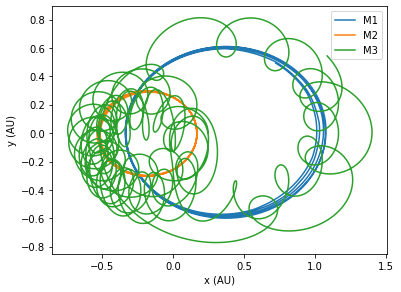

In [31]:
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label = 'M1')
plt.plot(x2, y2, label = 'M2')
plt.plot(x3, y3, label = 'M3')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.gca().set_aspect('equal')

plt.legend()

plt.show()

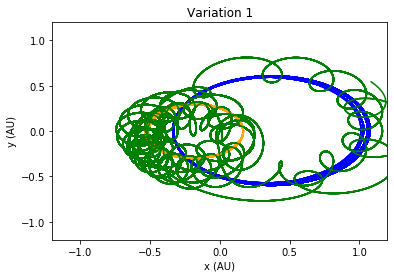

In [32]:
# count = 0
# for i in np.linspace(1,x1.size,100):
#     i = int(i)
#     count += 1
#     plt.plot(x1[1:i], y1[1:i], label = 'M1',color = 'blue')
#     plt.plot(x2[1:i], y2[1:i], label = 'M2',color = 'orange')
#     plt.plot(x3[1:i], y3[1:i], label = 'M3',color = 'green')
#     plt.xlabel('x (AU)')
#     plt.ylabel('y (AU)')
# #     plt.gca().set_aspect('equal')
#     plt.xlim([-1.2,1.2])
#     plt.ylim([-1.2,1.2])
#     plt.title('Variation 1')
#     plt.savefig('Var 1 frame' + str(count))

# # plt.legend()

# plt.show()

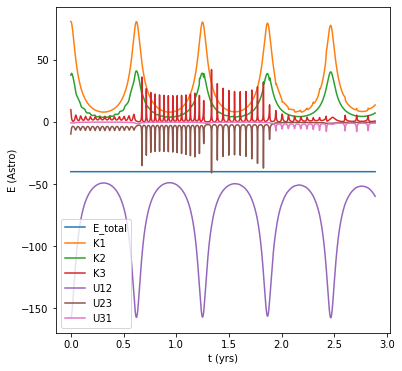

In [33]:
plt.figure(figsize=(6,6))
plt.plot(tarr, Etot, label = 'E_total')
plt.plot(tarr, K1, label = 'K1')
plt.plot(tarr, K2, label = 'K2')
plt.plot(tarr, K3, label = 'K3')
plt.plot(tarr, U12, label = 'U12')
plt.plot(tarr, U23, label = 'U23')
plt.plot(tarr, U31, label = 'U31')
plt.xlabel('t (yrs)')
plt.ylabel('E (Astro)')

plt.legend()

plt.show()

### When we set the distance between M2 and M3 to increase by 15.4%, we see that the planet transfers from orbiting M2 to orbiting M1.

# Variation 2 - changing the planet's initial position to get the planet to be slingshot out of the system

### Lets set the distance between M2 and M3 to decrease by 235%

In [22]:
# Here, we consider the time when out two bodies are furthest away
# Additionally, we orient our axis such that both bodies lie on the x-axis
l12 = np.sqrt(4*(np.pi**2) * M12 * a12 * (1 - e12**2))
l23 = np.sqrt(4*(np.pi**2) * M23 * a23 * (1 - e23**2))

v12_0 = (l12 * (1 + e12))/(a12 * (1 - e12**2))
v23_0 = (l23 * (1 + e23))/(a23 * (1 - e23**2))

vy10 = -(mu12/M1) * v12_0
vy20 = (mu12/M2) * v12_0
vy30 = (mu23/M3) * v23_0 + vy20

vy_com = (1/(M1 + M2 + M3)) * ((vy10 * M1) + (vy20 * M2) + (vy30 * M3))

vy10 -= vy_com
vy20 -= vy_com
vy30 -= vy_com

x10 = -(mu12/M1) * (a12 * (1 - e12**2))/(1 + e12)
x20 = (mu12/M2) * (a12 * (1 - e12**2))/(1 + e12)
x30 = (mu23/M3) * (a23 * (1 - e23**2))/(1 + e23) + x20

x_com = (1/(M1 + M2 + M3)) * ((x10 * M1) + (x20 * M2) + (x30 * M3))

x10 -= x_com
x20 -= x_com
x30 -= x_com

# here we set the distance to be 30% of the original distance
distance_between_23 = x30 - x20
distance_between_23 *= 2.35

x30 -= distance_between_23

vec0 = np.array([x10, 0, 0,
                 0, vy10, 0,
                 x20, 0, 0,
                 0, vy20, 0,
                 x30, 0, 0,
                 0, vy30, 0])

r12 = np.sqrt((x10-x20)**2)
r23 = np.sqrt((x20-x30)**2)
r31 = np.sqrt((x30-x10)**2)

v1 = vy10
v2 = vy20
v3 = vy30

U12 = -(G*M2*M1)/r12
U23 = -(G*M3*M2)/r23
U31 = -(G*M1*M3)/r31

K1 = 0.5*M1*v1**2
K2 = 0.5*M2*v2**2
K3 = 0.5*M3*v3**2

Etot = K1 + K2 + K3 + U12 + U23 + U31

In [40]:
P = np.sqrt((a12**3)/M)
tarr = np.linspace(0, 80*P, 200000)

ans = integrate.odeint(df_3body, vec0, tarr)

x1 = ans[:,0]
y1 = ans[:,1]
z1 = ans[:,2]
vx1 = ans[:,3]
vy1 = ans[:,4]
vz1 = ans[:,5]
x2 = ans[:,6]
y2 = ans[:,7]
z2 = ans[:,8]
vx2 = ans[:,9]
vy2 = ans[:,10]
vz2 = ans[:,11]
x3 = ans[:,12]
y3 = ans[:,13]
z3 = ans[:,14]
vx3 = ans[:,15]
vy3 = ans[:,16]
vz3 = ans[:,17]

In [41]:
r12 = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
r23 = np.sqrt((x2-x3)**2 + (y2-y3)**2 + (z2-z3)**2)
r31 = np.sqrt((x3-x1)**2 + (y3-y1)**2 + (z3-z1)**2)

v1 = np.sqrt(vx1**2 +  vy1**2 + vz1**2)
v2 = np.sqrt(vx2**2 +  vy2**2 + vz2**2)
v3 = np.sqrt(vx3**2 +  vy3**2 + vz3**2)

U12 = -(G*M2*M1)/r12
U23 = -(G*M3*M2)/r23
U31 = -(G*M1*M3)/r31

K1 = 0.5*M1*v1**2
K2 = 0.5*M2*v2**2
K3 = 0.5*M3*v3**2

Etot = K1 + K2 + K3 + U12 + U23 + U31

/Users/brandonshane/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


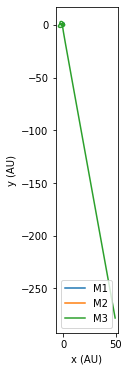

In [42]:
plt.figure(figsize=(6,6))
plt.plot(x1, y1, label = 'M1')
plt.plot(x2, y2, label = 'M2')
plt.plot(x3, y3, label = 'M3')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.gca().set_aspect('equal')

plt.legend()

plt.show()

KeyboardInterrupt: 

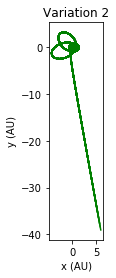

In [46]:
#Commented out to prevent accidental rerunning
# count = 0
# for i in np.linspace(1,x1.size,500):
#     i = int(i)
#     count += 1
#     plt.plot(x1[1:i], y1[1:i], label = 'M1',color = 'blue')
#     plt.plot(x2[1:i], y2[1:i], label = 'M2',color = 'orange')
#     plt.plot(x3[1:i], y3[1:i], label = 'M3',color = 'green')
#     plt.xlabel('x (AU)')
#     plt.ylabel('y (AU)')
#     plt.gca().set_aspect('equal')
# #     plt.xlim([-1.2,100])
# #     plt.ylim([-300,1.2])
#     plt.title('Variation 2')
#     plt.savefig('Var 2 frame' + str(count))

# # plt.legend()

# plt.show()

/Users/brandonshane/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


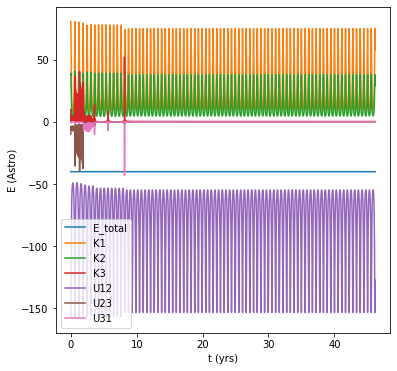

In [47]:
plt.figure(figsize=(6,6))
plt.plot(tarr, Etot, label = 'E_total')
plt.plot(tarr, K1, label = 'K1')
plt.plot(tarr, K2, label = 'K2')
plt.plot(tarr, K3, label = 'K3')
plt.plot(tarr, U12, label = 'U12')
plt.plot(tarr, U23, label = 'U23')
plt.plot(tarr, U31, label = 'U31')
plt.xlabel('t (yrs)')
plt.ylabel('E (Astro)')

plt.legend()

plt.show()

### When we set the distance between M2 and M3 to decrease by 235%, we see that the planet gets slingshot out of the system.

# Variation 3 - Creating highly eccentric orbits between masses 2 and 3 and masses 1 and 2 then pertubating the initial distances by slight amounts.

# Variation 4 - 3D Model with pertubations in z-plane

In [15]:
# Here, we consider the time when out two bodies are furthest away
# Additionally, we orient our axis such that both bodies lie on the x-axis
l12 = np.sqrt(4*(np.pi**2) * M12 * a12 * (1 - e12**2))
l23 = np.sqrt(4*(np.pi**2) * M23 * a23 * (1 - e23**2))

v12_0 = (l12 * (1 + e12))/(a12 * (1 - e12**2))
v23_0 = (l23 * (1 + e23))/(a23 * (1 - e23**2))

vy10 = -(mu12/M1) * v12_0
vy20 = (mu12/M2) * v12_0
vy30 = (mu23/M3) * v23_0 + vy20

vy_com = (1/(M1 + M2 + M3)) * ((vy10 * M1) + (vy20 * M2) + (vy30 * M3))

vy10 -= vy_com
vy20 -= vy_com
vy30 -= vy_com

x10 = -(mu12/M1) * (a12 * (1 - e12**2))/(1 + e12)
x20 = (mu12/M2) * (a12 * (1 - e12**2))/(1 + e12)
x30 = (mu23/M3) * (a23 * (1 - e23**2))/(1 + e23) + x20

x_com = (1/(M1 + M2 + M3)) * ((x10 * M1) + (x20 * M2) + (x30 * M3))

x10 -= x_com
x20 -= x_com
x30 -= x_com

vec0 = np.array([x10, 0, 0,
                 0, vy10, 0,
                 x20, 0, 0,
                 0, vy20, 0,
                 x30, 0, 0,
                 0, 0, vy30])

r12 = np.sqrt((x10-x20)**2)
r23 = np.sqrt((x20-x30)**2)
r31 = np.sqrt((x30-x10)**2)

v1 = vy10
v2 = vy20
v3 = vy30

U12 = -(G*M2*M1)/r12
U23 = -(G*M3*M2)/r23
U31 = -(G*M1*M3)/r31

K1 = 0.5*M1*v1**2
K2 = 0.5*M2*v2**2
K3 = 0.5*M3*v3**2

Etot = K1 + K2 + K3 + U12 + U23 + U31

In [16]:
P = np.sqrt((a12**3)/M)
tarr = np.linspace(0, 80*P, 200000)

ans = integrate.odeint(df_3body, vec0, tarr)

x1 = ans[:,0]
y1 = ans[:,1]
z1 = ans[:,2]
vx1 = ans[:,3]
vy1 = ans[:,4]
vz1 = ans[:,5]
x2 = ans[:,6]
y2 = ans[:,7]
z2 = ans[:,8]
vx2 = ans[:,9]
vy2 = ans[:,10]
vz2 = ans[:,11]
x3 = ans[:,12]
y3 = ans[:,13]
z3 = ans[:,14]
vx3 = ans[:,15]
vy3 = ans[:,16]
vz3 = ans[:,17]

In [17]:
r12 = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
r23 = np.sqrt((x2-x3)**2 + (y2-y3)**2 + (z2-z3)**2)
r31 = np.sqrt((x3-x1)**2 + (y3-y1)**2 + (z3-z1)**2)

v1 = np.sqrt(vx1**2 +  vy1**2 + vz1**2)
v2 = np.sqrt(vx2**2 +  vy2**2 + vz2**2)
v3 = np.sqrt(vx3**2 +  vy3**2 + vz3**2)

U12 = -(G*M2*M1)/r12
U23 = -(G*M3*M2)/r23
U31 = -(G*M1*M3)/r31

K1 = 0.5*M1*v1**2
K2 = 0.5*M2*v2**2
K3 = 0.5*M3*v3**2

Etot = K1 + K2 + K3 + U12 + U23 + U31

In [18]:
P = np.sqrt((a12**3)/M)
tarr = np.linspace(0, 5*P, 200000)

ans = integrate.odeint(df_3body, vec0, tarr)

x1 = ans[:,0]
y1 = ans[:,1]
z1 = ans[:,2]
vx1 = ans[:,3]
vy1 = ans[:,4]
vz1 = ans[:,5]
x2 = ans[:,6]
y2 = ans[:,7]
z2 = ans[:,8]
vx2 = ans[:,9]
vy2 = ans[:,10]
vz2 = ans[:,11]
x3 = ans[:,12]
y3 = ans[:,13]
z3 = ans[:,14]
vx3 = ans[:,15]
vy3 = ans[:,16]
vz3 = ans[:,17]

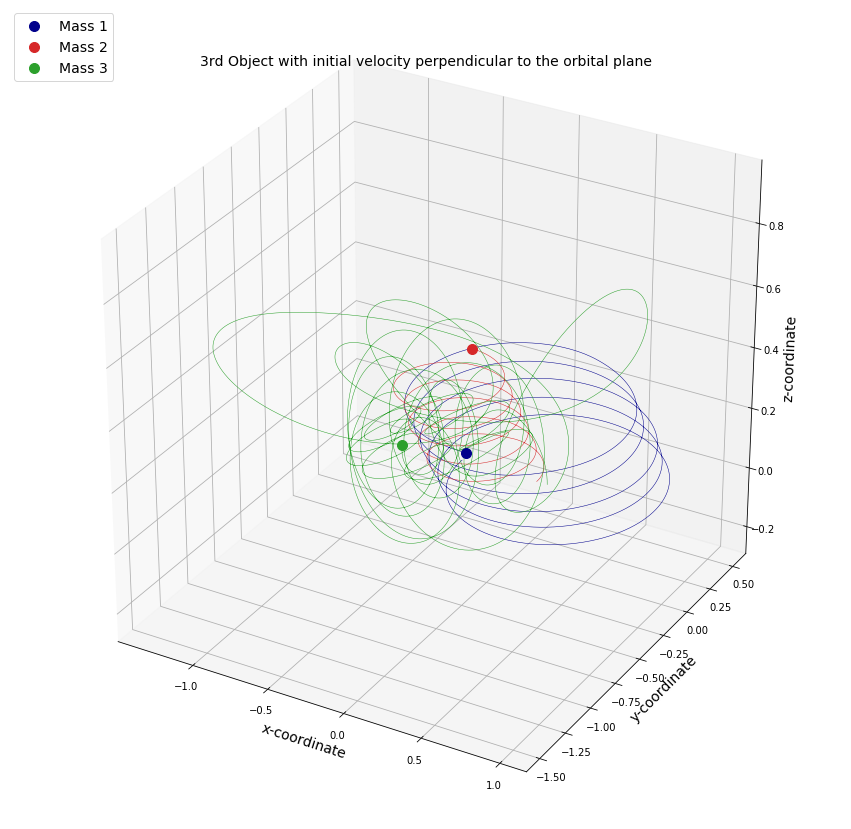

In [19]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
#Create figure
fig=plt.figure(figsize=(15,15))

#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(x1,y1,z1,color="darkblue", lw = 0.5)
ax.plot(x2,y2,z2,color="tab:red", lw = 0.5)
ax.plot(x3,y3,z3,color="tab:green", lw = 0.5)

#Plot the final positions of the stars
ax.scatter(x1[-1],y1[-1],z1[-1],color="darkblue",marker="o",s=100,label="Mass 1")
ax.scatter(x2[-1],y2[-1],z2[-1],color="tab:red",marker="o",s=100,label="Mass 2")
ax.scatter(x3[-1],y3[-1],z3[-1],color="tab:green",marker="o",s=100,label="Mass 3")

#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("3rd Object with initial velocity perpendicular to the orbital plane",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

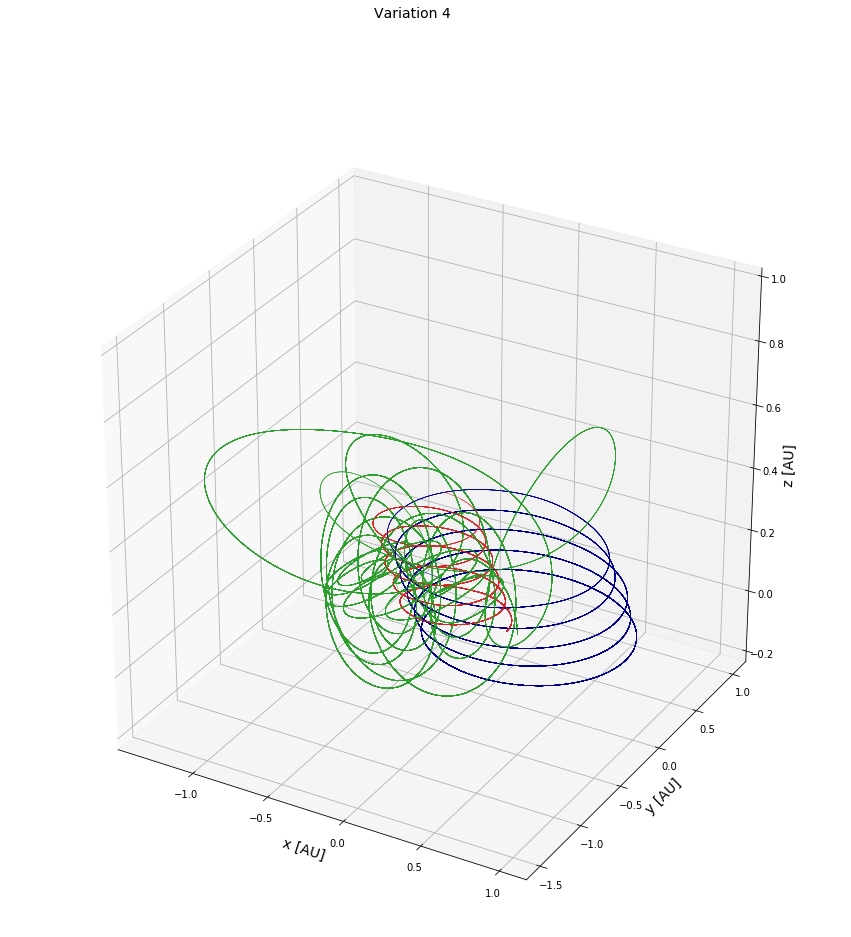

In [20]:
# fig=plt.figure(figsize=(15,15))
# plt.suptitle("Variation 4",fontsize=14)

# #Create 3D axes
# ax=fig.add_subplot(111,projection="3d")

# count = 0
# for i in np.linspace(1,x1.size,100):
#     i = int(i)
#     count += 1

#     ax.plot(x1[1:i],y1[1:i],z1[1:i],color="darkblue", lw = 0.5)
#     ax.plot(x2[1:i],y2[1:i],z2[1:i],color="tab:red", lw = 0.5)
#     ax.plot(x3[1:i],y3[1:i],z3[1:i],color="tab:green", lw = 0.5)


#     #Add a few more bells and whistles
#     ax.set_xlabel("x [AU]",fontsize=14)
#     ax.set_ylabel("y [AU]",fontsize=14)
#     ax.set_zlabel("z [AU]",fontsize=14)
#     plt.savefig('Var 4 frame' + str(count))
    
# plt.show()
    